In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import numpy
import netCDF4 as nc
from scipy.stats import norm
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit

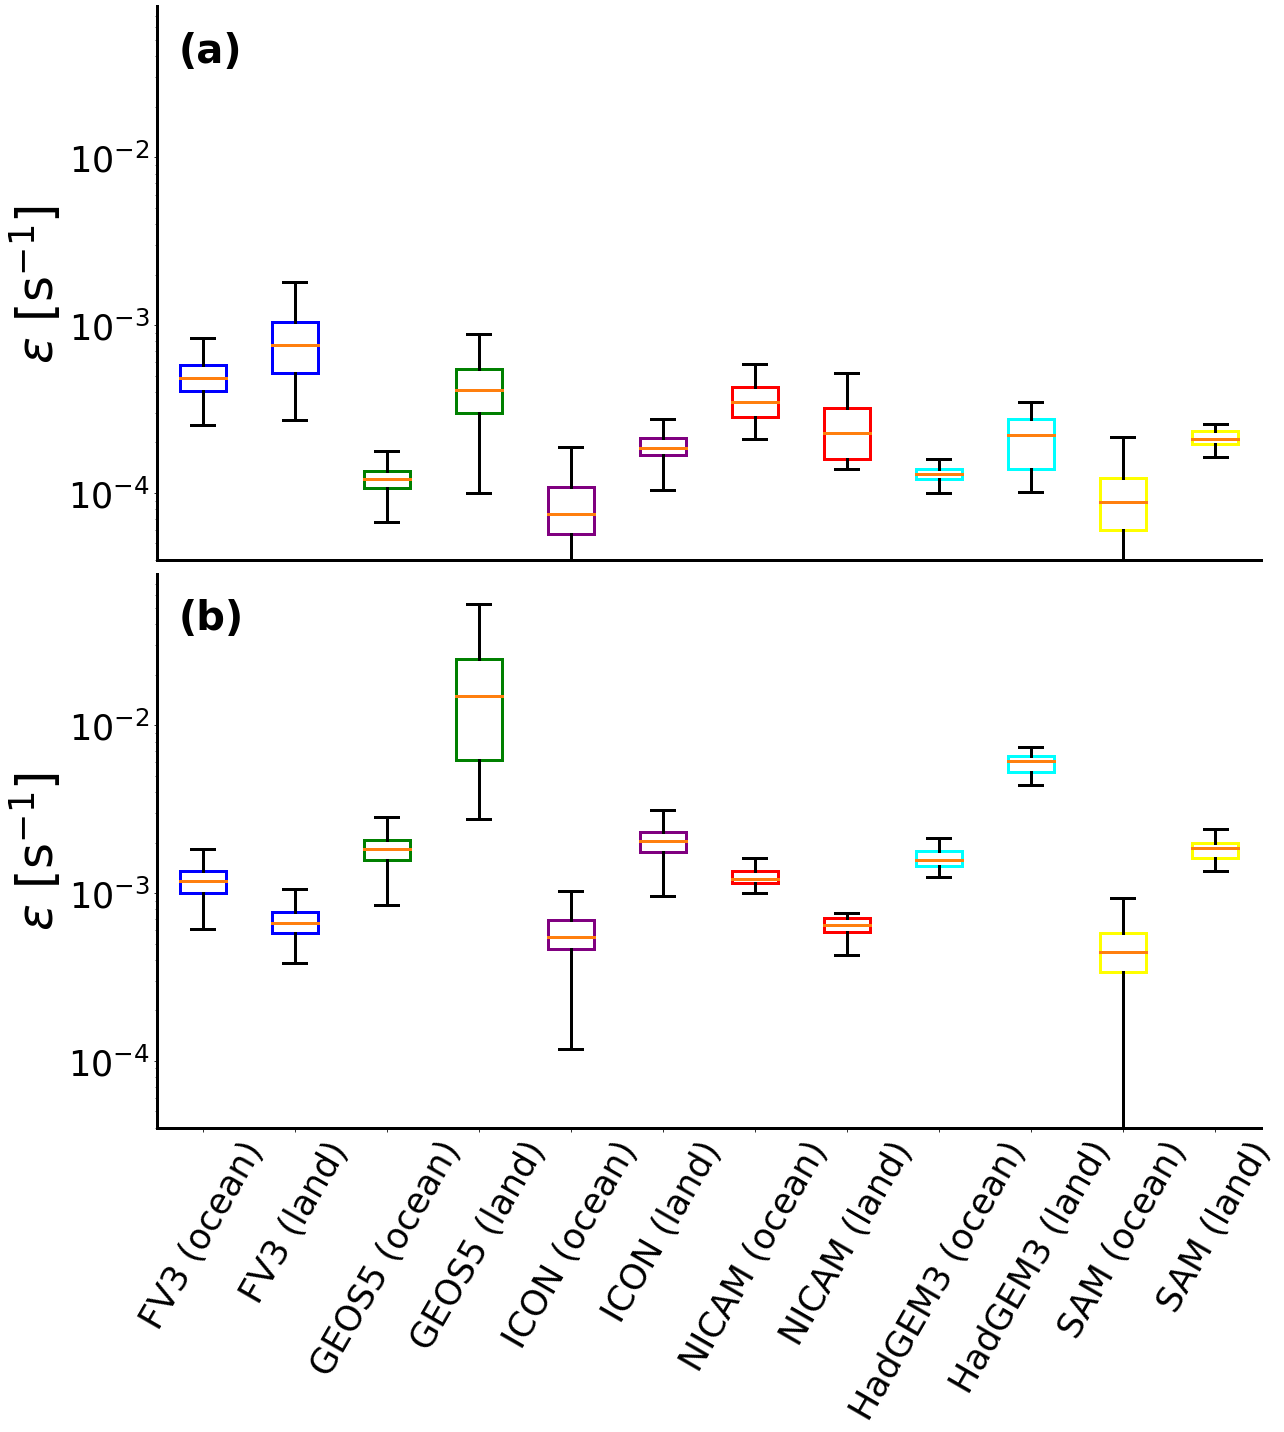

In [4]:
basedir = '/input/directory/'
models = ['FV3', 'GEOS5', 'ICON', 'HadGEM3', 'NICAM', 'SAM']

datasets_0001_ocean = [xr.open_dataset(f"{basedir}{model}_PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg_ocean_values.nc") for model in models]
datasets_0001_land = [xr.open_dataset(f"{basedir}{model}_PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg_land_values.nc") for model in models]

basedir = '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_PRECEFF/PRECEFF_TIMEAVG_CWP_FILTERED/'
datasets_1_ocean = [xr.open_dataset(f"{basedir}{model}_PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg_ocean_values.nc") for model in models]
datasets_1_land = [xr.open_dataset(f"{basedir}{model}_PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg_land_values.nc") for model in models]

values_0001_ocean = [ds['PRECEFF_TIMEAVG'][0].values[~np.isnan(ds['PRECEFF_TIMEAVG'][0].values)] for ds in datasets_0001_ocean]
values_0001_land = [ds['PRECEFF_TIMEAVG'][0].values[~np.isnan(ds['PRECEFF_TIMEAVG'][0].values)] for ds in datasets_0001_land]
values_1_ocean = [ds['PRECEFF_TIMEAVG'][0].values[~np.isnan(ds['PRECEFF_TIMEAVG'][0].values)] for ds in datasets_1_ocean]
values_1_land = [ds['PRECEFF_TIMEAVG'][0].values[~np.isnan(ds['PRECEFF_TIMEAVG'][0].values)] for ds in datasets_1_land]

dataset1 = values_0001_ocean + values_0001_land
dataset2 = values_1_ocean + values_1_land
colors = ['blue', 'blue', 'green', 'green', 'purple', 'purple', 'red', 'red', 'cyan', 'cyan', 'yellow', 'yellow']

fig, axes = plt.subplots(2, 1, figsize=(18, 20))

for i, (dataset, ax, label) in enumerate(zip([dataset1, dataset2], axes, ['(a)', '(b)'])):
    box = ax.boxplot(dataset, patch_artist=True, showfliers=False)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor('white')
        patch.set_edgecolor(color)
        patch.set_linewidth(3)
    for part in ['whiskers', 'caps', 'medians']:
        for element in box[part]:
            element.set(linewidth=3)
    ax.set_yscale('log')
    ax.set_ylim((10**-4.4, 10**-1.1))
    ax.set_ylabel(r'$\epsilon$ [s$^{-1}$]', fontsize=50)
    ax.text(0.02, 0.90, label, transform=ax.transAxes, fontsize=40, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.tick_params(axis='y', labelsize=35)  
    if i == 1:
        labels = ['FV3 (ocean)', 'FV3 (land)', 'GEOS5 (ocean)', 'GEOS5 (land)', 'ICON (ocean)', 'ICON (land)',
                  'NICAM (ocean)', 'NICAM (land)', 'HadGEM3 (ocean)', 'HadGEM3 (land)', 'SAM (ocean)', 'SAM (land)']
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=60, fontsize=35)
    else:
        ax.set_xticks([])  

plt.tight_layout()
plt.savefig('/output/directory/Box_whisker_Plots_CWP_filtered_land_ocean.png', dpi=50, bbox_inches='tight')
plt.savefig('/output/directory/Box_whisker_Plots_CWP_filtered_land_ocean.pdf', format="pdf", dpi=50, bbox_inches='tight')
plt.show()